In [1]:
import numpy as np
from glob import glob
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image                  
from tqdm import tqdm
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline  

C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
import sys

In [24]:
sys.version

'3.5.5 |Anaconda, Inc.| (default, Mar 12 2018, 17:44:09) [MSC v.1900 64 bit (AMD64)]'

In [25]:
import tensorflow, keras

In [26]:
tensorflow.__version__

'1.4.0'

In [27]:
keras.__version__

'2.0.8'

In [2]:
test_file = 'Denner' # specify filename
test_file_path = 'image_test/'+test_file + '.jpg'
test_file_path

'image_test/Denner.jpg'

In [3]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("image_test/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13 total human images.


Faces detected: 1


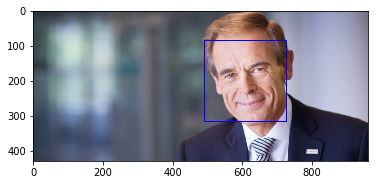

In [4]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(test_file_path)
#img = image.load_img(test_file_path,grayscale=True)#, target_size=(48, 48))

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [5]:
faces

array([[492,  83, 234, 234]], dtype=int32)

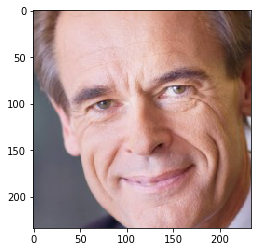

True

In [6]:
image1 = cv2.imread(test_file_path)
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)
#cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image[67 : 67+182, 76:76+182]
for (x,y,w,h) in faces:
    #print(x,y,w,h)
    crop_img = image1[y:y+h,x:x+w]
    
croped_rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
plt.imshow(croped_rgb)
plt.show()
cv2.imwrite('image_test/croped/'+test_file+".jpg", crop_img)

In [7]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [8]:
croped_gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
# plt.imshow(croped_gray)
# plt.show()
croped_gray.shape

(234, 234)

In [9]:
im = cv2.resize(croped_gray, (48, 48))
# plt.imshow(im)
# plt.show()
# im.reshape(-1,1,48, 48)
# im.shape


In [10]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [11]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, grayscale=True ,target_size=(48, 48))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [12]:
def Predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(myModel.predict(img))

In [13]:
labels = ['angry', 'fear', 'happy', 'sad', 'surprise','neutral']

myModel = load_model('model/model_on_2018-09-18.h5')

In [14]:
# img = image.load_img(test_file_path, target_size=(48, 48))
# img

In [15]:
img = image.load_img('image_test/croped/'+test_file+'.jpg',grayscale=True, target_size=(48, 48))
#img

In [16]:
x = image.img_to_array(img)
x.shape

(48, 48, 1)

In [17]:
test_image = path_to_tensor('image_test/croped/'+test_file+".jpg").astype('float32')
test_image.shape

(1, 48, 48, 1)

In [18]:
y_pred = myModel.predict(test_image)

list(y_pred[0]).index(y_pred[0].max())

2

In [19]:
y_pred

array([[0.00195491, 0.00176896, 0.90192825, 0.00323198, 0.00172612,
        0.08938977]], dtype=float32)

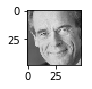

In [20]:
fig = plt.figure(figsize=(1,1))
fig.add_subplot()
plt.imshow(img)

['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

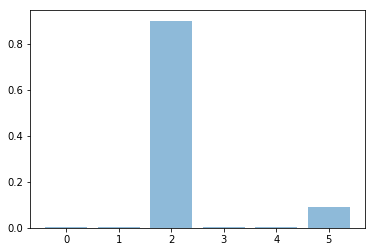

In [21]:
plt.bar(np.arange(0,6), y_pred[0],alpha=0.5)
labels